# Spectral Clustering on Normal Graph

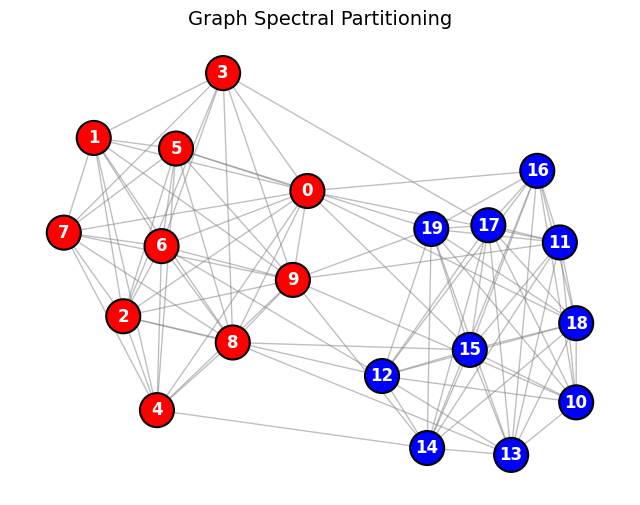

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix
from scipy.linalg import eigh
import networkx as nx

# Set random seed for reproducibility
np.random.seed(42)


n1, n2 = 10, 10  # Cluster sizes
n = n1 + n2  # Total nodes
A = np.zeros((n, n), dtype=int)

p_intra = 0.8  
A[:n1, :n1] = (np.random.rand(n1, n1) < p_intra).astype(int)  
A[n1:, n1:] = (np.random.rand(n2, n2) < p_intra).astype(int)  # Cluster 2

p_inter = 0.15  
A[:n1, n1:] = (np.random.rand(n1, n2) < p_inter).astype(int)  # Connect clusters
A[n1:, :n1] = A[:n1, n1:].T  # Make symmetric

np.fill_diagonal(A, 0)
L = laplacian(csr_matrix(A)).toarray()
eigvals, eigvecs = eigh(L)

fiedler_vector = eigvecs[:, 1]
partition = fiedler_vector > 0  # Split nodes into two groups

G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G, seed=42, k=0.2)  

# Assign colors based on partitioning
colors = ['red' if p else 'blue' for p in partition]

# Step 6: High-Quality Visualization
plt.figure(figsize=(8, 6))
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1, edge_color="gray")  # Faint edges
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=600, edgecolors="black", linewidths=1.5)  # Clear nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_color="white", font_weight="bold")  # Labels

plt.title("Graph Spectral Partitioning", fontsize=14)
plt.axis("off")
plt.show()


# On different Eigenvalues

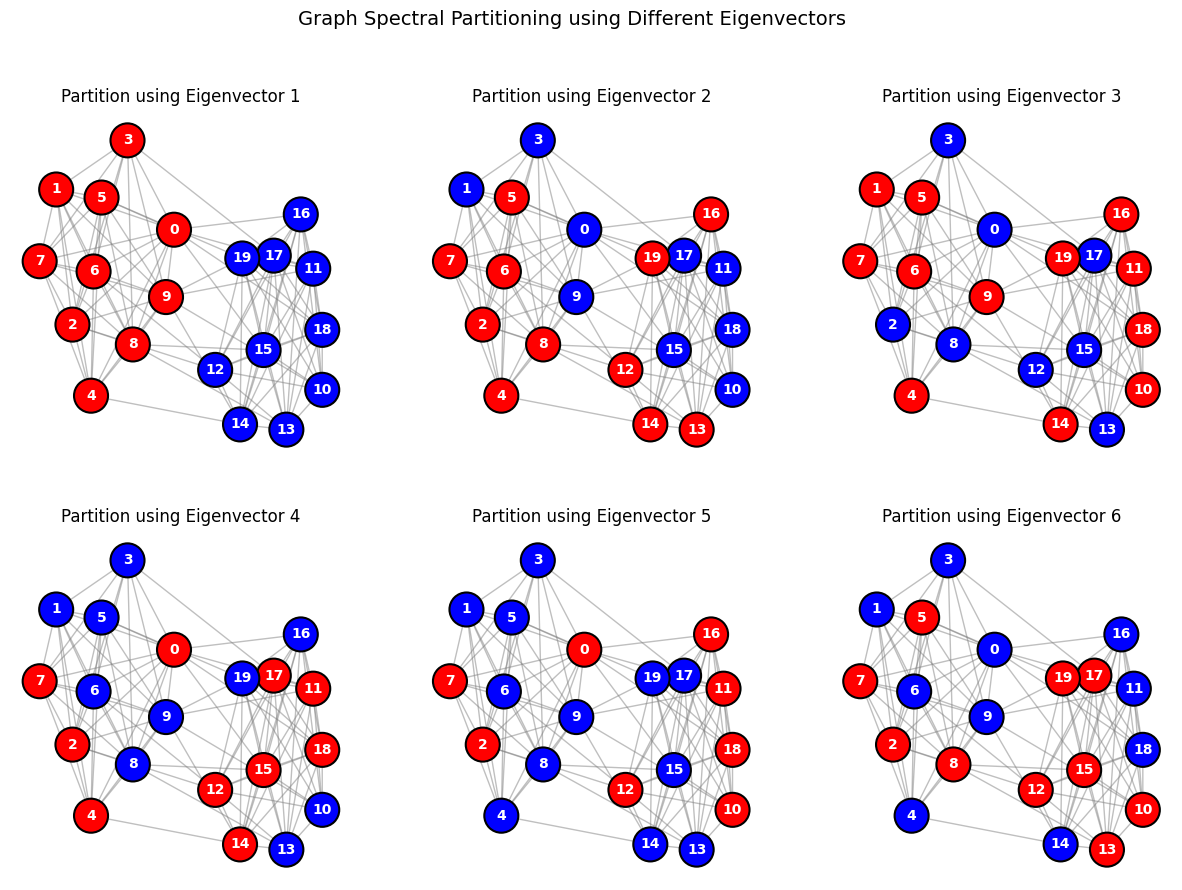

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix
from scipy.linalg import eigh
import networkx as nx

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create Two Clusters
n1, n2 = 10, 10  # Cluster sizes
n = n1 + n2  # Total nodes
A = np.zeros((n, n), dtype=int)

p_intra = 0.8 
A[:n1, :n1] = (np.random.rand(n1, n1) < p_intra).astype(int)  
A[n1:, n1:] = (np.random.rand(n2, n2) < p_intra).astype(int)  

p_inter = 0.15  
A[:n1, n1:] = (np.random.rand(n1, n2) < p_inter).astype(int)  
A[n1:, :n1] = A[:n1, n1:].T 
# Remove self-loops
np.fill_diagonal(A, 0)

# Step 2: Compute the Laplacian Matrix
L = laplacian(csr_matrix(A)).toarray()

# Step 3: Compute Eigenvalues and Eigenvectors
eigvals, eigvecs = eigh(L)

# Step 4: Convert to NetworkX for Better Layouts
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G, seed=42, k=0.2)  # Force-directed layout

# Step 5: Visualize Different Eigenvector-Based Partitions
num_partitions = min(6, n - 1)  # Number of partitions to show
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Arrange in a 2x3 grid

for i in range(num_partitions):
    ax = axes[i // 3, i % 3]  # Get subplot location
    fiedler_vector = eigvecs[:, i + 1]  # Eigenvector (skip first trivial one)
    partition = fiedler_vector > 0  # Split into two clusters

    # Assign colors based on partitioning
    colors = ['red' if p else 'blue' for p in partition]

    # Draw graph
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1, edge_color="gray", ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=600, edgecolors="black", linewidths=1.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="white", font_weight="bold", ax=ax)

    ax.set_title(f"Partition using Eigenvector {i+1}", fontsize=12)
    ax.axis("off")

plt.suptitle("Graph Spectral Partitioning using Different Eigenvectors", fontsize=14)
plt.show()


# Multiple Partitions

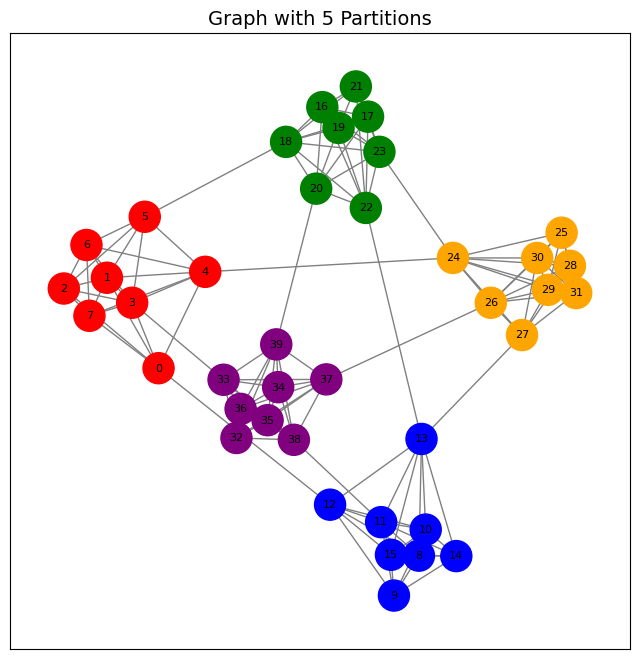

In [40]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with 5 partitions
num_clusters = 5
nodes_per_cluster = 8
G = nx.Graph()

# Create 5 clusters with dense connections
clusters = []
for i in range(num_clusters):
    nodes = list(range(i * nodes_per_cluster, (i + 1) * nodes_per_cluster))
    clusters.append(nodes)
    G.add_nodes_from(nodes)
    for u in nodes:
        for v in nodes:
            if u != v and np.random.rand() < 0.7:  # High probability for intra-cluster edges
                G.add_edge(u, v)

# Add sparse inter-cluster connections
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        u = np.random.choice(clusters[i])
        v = np.random.choice(clusters[j])
        G.add_edge(u, v)

# Visualization
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
colors = ["red", "blue", "green", "orange", "purple"]  # Different colors for clusters

# Assign colors to nodes based on their cluster
node_colors = []
for i, cluster in enumerate(clusters):
    node_colors.extend([colors[i]] * len(cluster))

nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray", font_size=8)
plt.title("Graph with 5 Partitions", fontsize=14)
plt.show()
